In [1]:
from keras.layers import Convolution2D

In [2]:
from keras.layers import MaxPooling2D

In [3]:
from keras.layers import Flatten

In [4]:
from keras.layers import Dense

In [5]:
from keras.models import Sequential

In [6]:
model = Sequential()

In [7]:
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                   input_shape=(64, 64, 3)
                       ))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                       ))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(Flatten())

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-traina

In [15]:
model.add(Dense(units=128, activation='relu'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [17]:
model.add(Dense(units=1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [26]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'training_set/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        'test_set/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
model.fit(
        training_set,
        steps_per_epoch=8000,
        epochs=2,
        validation_data=test_set,
        validation_steps=800)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/2
8000/8000 [==============================] - 242s 30ms/step - loss: 0.6563 - accuracy: 0.6025 - val_loss: 0.6004 - val_accuracy: 0.6841


In [27]:
model.save('my.h5')

In [33]:
from keras.models import load_model

In [34]:
m = load_model('my.h5')

In [44]:
import keras.utils as image

In [62]:
test_image = image.load_img('cat.jpeg', 
               target_size=(64,64))

In [63]:
type(test_image)

PIL.Image.Image

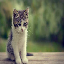

In [64]:
test_image

In [65]:
test_image = image.img_to_array(test_image)

In [66]:
type(test_image)

numpy.ndarray

In [67]:
test_image.shape

(64, 64, 3)

In [68]:
import numpy as np 

In [69]:
test_image = np.expand_dims(test_image, axis=0)

In [70]:
test_image.shape

(1, 64, 64, 3)

In [73]:
result = m.predict(test_image)

1/1 [==============================] - 0s 50ms/step


In [74]:
result

array([[1.9867791e-32]], dtype=float32)

In [75]:
if result[0][0] == 1.0:
    print('cat')
else:
    print('dog')

dog


In [76]:
r = training_set.class_indices

In [77]:
r

{'cats': 0, 'dogs': 1}